4(a)

In [167]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [191]:
# random create testing data (size = 10000)
testing_data = np.random.uniform(-1.5,1.5,(10000,2))
testing_data

array([[ 0.23556322,  0.66587584],
       [ 1.07468887, -1.46547411],
       [ 0.43563274,  0.14648564],
       ..., 
       [-1.46112587,  1.02098177],
       [-0.20778325, -0.74153509],
       [-0.31155703,  0.6499973 ]])

In [176]:
# Perceptron Learning Algorithm (Dual Form)
def R(dataset):
    max_dist = 0
    for x, y in dataset:
        dist = math.hypot(x[0],x[1])
        if dist > max_dist:
            max_dist = dist
    return math.pow(max_dist,2)

def pla_dual(dataset):
    data_size = len(dataset)
    r = R(dataset)
    alpha = np.zeros(data_size)
    b = 0
    update = True
    while update == True:
        update = False
        for i, data in enumerate(dataset):
            x = np.array(data[0])  #xi
            y = data[1]  #yi
            w = 0
            for j in range(data_size):
                w += alpha[j] * dataset[j][1] * math.pow(np.inner(dataset[j][0], x), 2)
            if y * (w + b) <= 0:  #update
                alpha[i] += 1
                b += y * math.pow(r, 2)
                update = True
    return alpha, b
def classifier_dual(alpha, b, dataset, x):
    w = 0
    for i in range(len(dataset)):
        w += alpha[i] * dataset[i][1] * math.pow(np.inner(dataset[i][0], x), 2)
    return w + b > 0

In [169]:
datasetA = np.array([
((0, 0), 1),((0.5, 0), 1),((0, 0.5), 1),((-0.5, 0), 1),((0,-0.5), 1),
((0.5, 0.5), -1),((0.5, -0.5), -1),((-0.5, 0.5), -1),((-0.5, -0.5), -1),
((1, 0), -1),((0, 1), -1),((-1, 0), -1),((0, -1), -1),
])

In [175]:
# find the hypothesis...
h1 = pla_dual(datasetA)
print(h1)

(array([ 10.,   1.,   0.,   0.,   0.,   5.,   5.,   0.,   0.,   0.,   0.,
         0.,   0.]), 1.0)


4(b)

In [178]:
# predict...
result1 = []
result1.append([])
result1.append([])
for i,x in enumerate(testing_data):
    if classifier_dual(h1[0], h1[1], datasetA, x) == True:
        result1[0].append(testing_data[i][0])
        result1[1].append(testing_data[i][1])

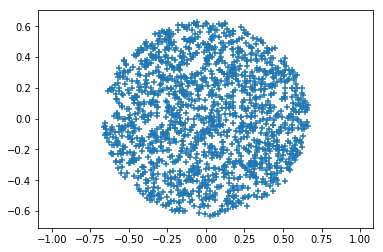

In [183]:
# plot result...
plt.scatter(result1[0], result1[1], marker='+')
plt.axis('equal')
plt.show()

4(c)

In [184]:
datasetB = np.array([
((0.5, 0), 1),((0, 0.5), 1),((-0.5, 0), 1),((0,-0.5), 1),
((0.5, 0.5), -1),((0.5, -0.5), -1),((-0.5, 0.5), -1),((-0.5, -0.5), -1)
])

In [185]:
# find the hypothesis...
h2 = pla_dual(datasetB)
print(h2)

(array([ 5.,  2.,  0.,  0.,  3.,  3.,  0.,  0.]), 0.2500000000000001)


In [186]:
# predict...
result2 = []
result2.append([])
result2.append([])
for i,x in enumerate(testing_data):
    if classifier_dual(h2[0], h2[1], datasetB, x) == True:
        result2[0].append(testing_data[i][0])
        result2[1].append(testing_data[i][1])

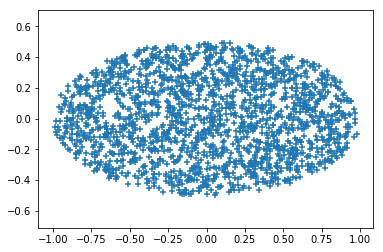

In [187]:
# plot result
plt.scatter(result2[0], result2[1], marker='+')
plt.axis('equal')
plt.show()

4(d)

In [192]:
# mapping to [−x1*x2, x1^2, x1*x2, x2^2 ] : datasetA
tmp = []
for i in range(len(datasetA)):
    tmp.append([(-1*datasetA[i][0][0]*datasetA[i][0][1],math.pow(datasetA[i][0][0],2),
                datasetA[i][0][0]*datasetA[i][0][1],math.pow(datasetA[i][0][1],2)),datasetA[i][1]])
new_datasetA = np.array(tmp)
new_datasetA

array([[(0, 0.0, 0, 0.0), 1],
       [(-0.0, 0.25, 0.0, 0.0), 1],
       [(0.0, 0.0, 0.0, 0.25), 1],
       [(0.0, 0.25, -0.0, 0.0), 1],
       [(-0.0, 0.0, -0.0, 0.25), 1],
       [(-0.25, 0.25, 0.25, 0.25), -1],
       [(0.25, 0.25, -0.25, 0.25), -1],
       [(0.25, 0.25, -0.25, 0.25), -1],
       [(-0.25, 0.25, 0.25, 0.25), -1],
       [(0, 1.0, 0, 0.0), -1],
       [(0, 0.0, 0, 1.0), -1],
       [(0, 1.0, 0, 0.0), -1],
       [(0, 0.0, 0, 1.0), -1]], dtype=object)

In [189]:
# Perceptron Learning Algorithm (Primal Form)
def pla_primal(dataset):
    data_size = len(dataset)
    r = R(dataset)
    w = np.zeros(4)
    b = 0
    k = 1
    learning_rate = 1/k
    update = True
    while update == True:
        update = False
        for i, data in enumerate(dataset):
            x = np.array(data[0])  #xi
            y = data[1]  #yi
            if y * (np.inner(w,x) + b) <= 0:  #update
                w += learning_rate * y * x
                b += learning_rate * y * math.pow(r, 2)
                k += 1
                update = True
    return k-1, w, b
def classifier_primal(w, b, x):
    return np.inner(w, x) + b > 0

In [195]:
# find the hypothesis
new_h = pla_primal(new_datasetA)
print(new_h)

(21, array([ 0.  , -2.25,  0.  , -2.5 ]), 1.0)


4(e)

In [196]:
# mapping to [−x1*x2, x1^2, x1*x2, x2^2 ] : testing data
tmp = []
for i in range(len(testing_data)):
    tmp.append((-1*testing_data[i][0]*testing_data[i][1],math.pow(testing_data[i][0],2),
                testing_data[i][0]*testing_data[i][1],math.pow(testing_data[i][1],2)))
new_testing_data= np.array(tmp)
print(new_testing_data)

[[-0.15685586  0.05549003  0.15685586  0.44339063]
 [ 1.57492871  1.15495616 -1.57492871  2.14761435]
 [-0.06381394  0.18977589  0.06381394  0.02145804]
 ..., 
 [ 1.49178287  2.1348888  -1.49178287  1.04240377]
 [-0.15407857  0.04317388  0.15407857  0.54987429]
 [ 0.20251123  0.09706778 -0.20251123  0.4224965 ]]


In [197]:
# predict...
result3 = []
result3.append([])
result3.append([])
for i,x in enumerate(new_testing_data):
    if classifier_primal(new_h[1], new_h[2], x) == True:
        result3[0].append(testing_data[i][0])
        result3[1].append(testing_data[i][1])

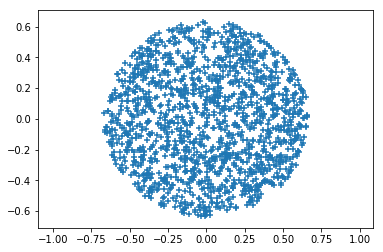

In [198]:
# plot result...
plt.scatter(result3[0], result3[1], marker='+')
plt.axis('equal')
plt.show()